In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
# Importing Dataset

df = pd.read_csv('Telecom_Customer_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Here we can see that we have categorical and continuous variables:
* customerID: Unique identifier for each customer.
* gender: Customer's gender (e.g., Male, Female).
* SeniorCitizen: Indicates if the customer is a senior citizen (1 = Yes, 0 = No).
* Partner: Whether the customer has a partner (Yes/No).
* Dependents: Whether the customer has dependents (Yes/No).
* tenure: Number of months the customer has stayed with the company.
* PhoneService: Indicates if the customer has phone service (Yes/No).
* MultipleLines: Whether the customer has multiple phone lines (Yes/No/No phone service).
* InternetService: Type of internet service (DSL, Fiber optic, No).
* OnlineSecurity: Whether the customer has online security service (Yes/No/No internet).
* OnlineBackup: Whether the customer has online backup service (Yes/No/No internet).
* DeviceProtection: Whether the customer has device protection service (Yes/No/No internet).
* TechSupport: Whether the customer has technical support service (Yes/No/No internet).
* StreamingTV: Whether the customer has streaming TV service (Yes/No/No internet).
* StreamingMovies: Whether the customer has streaming movie service (Yes/No/No internet).
* Contract: Type of customer contract (Month-to-month, One year, Two year).
* PaperlessBilling: Whether the customer is on paperless billing (Yes/No).
* PaymentMethod: Customer's payment method (e.g., Bank transfer, Credit card, Electronic check).
* MonthlyCharges: Monthly amount charged to the customer.
* TotalCharges: Total amount charged to the customer to date.
* Churn: Indicates whether the customer has left the service (Yes/No)

In [3]:
unique_count = df.nunique()
unique_count

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Here, we can observe that we have 21 columns and 7,043 entries. Additionally, we can confirm that there are no
missing values, meaning no imputation or treatment is required.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

A quick glance at our data reveals no discrepancies in the continuous variables, so no immediate treatment 
is required. We'll revisit this later to see if anything arises.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 2. Data Analysis

a) Categorial Values

We can see that our dataset contains a large number of categorical variables, so let's start by examining 
their behavior:
* Gender: The gender distribution is well-balanced, with nearly the same number of male and female customers.
* Senior Citizen: 84% of our customers are not considered senior citizens, though 16% of them fall into this category.
* Partner: Our customer base is evenly split, with approximately 50% having a partner and 50% being single.
* Dependents: 70% of our customers do not have dependents.
* Phone Service: A key point is that 90% of our customers subscribe to phone services.
* Multiple Lines: The most noteworthy insight here is that 42% of customers have more than one phone line.
* Internet Service: 78% of customers have an internet subscription.
* Online Security, Backup, Device Protection, Tech Support: Among customers with internet service, around 55% do not subscribe to these additional services on average.
* Streaming TV and Movies: Roughly 50% of internet users also use streaming services.
* Contract: 55% of our customers are on month-to-month contracts.
* Paperless Billing: 60% of customers do not opt for paper billing.
* Payment Method: Payment methods are fairly balanced across the four categories, though electronic checks have a slight edge in usage.
* Churn: The target variable is imbalanced, with significantly more "No" than "Yes" responses. Only 26.5% of customers have churned, which is the key outcome we want to predict

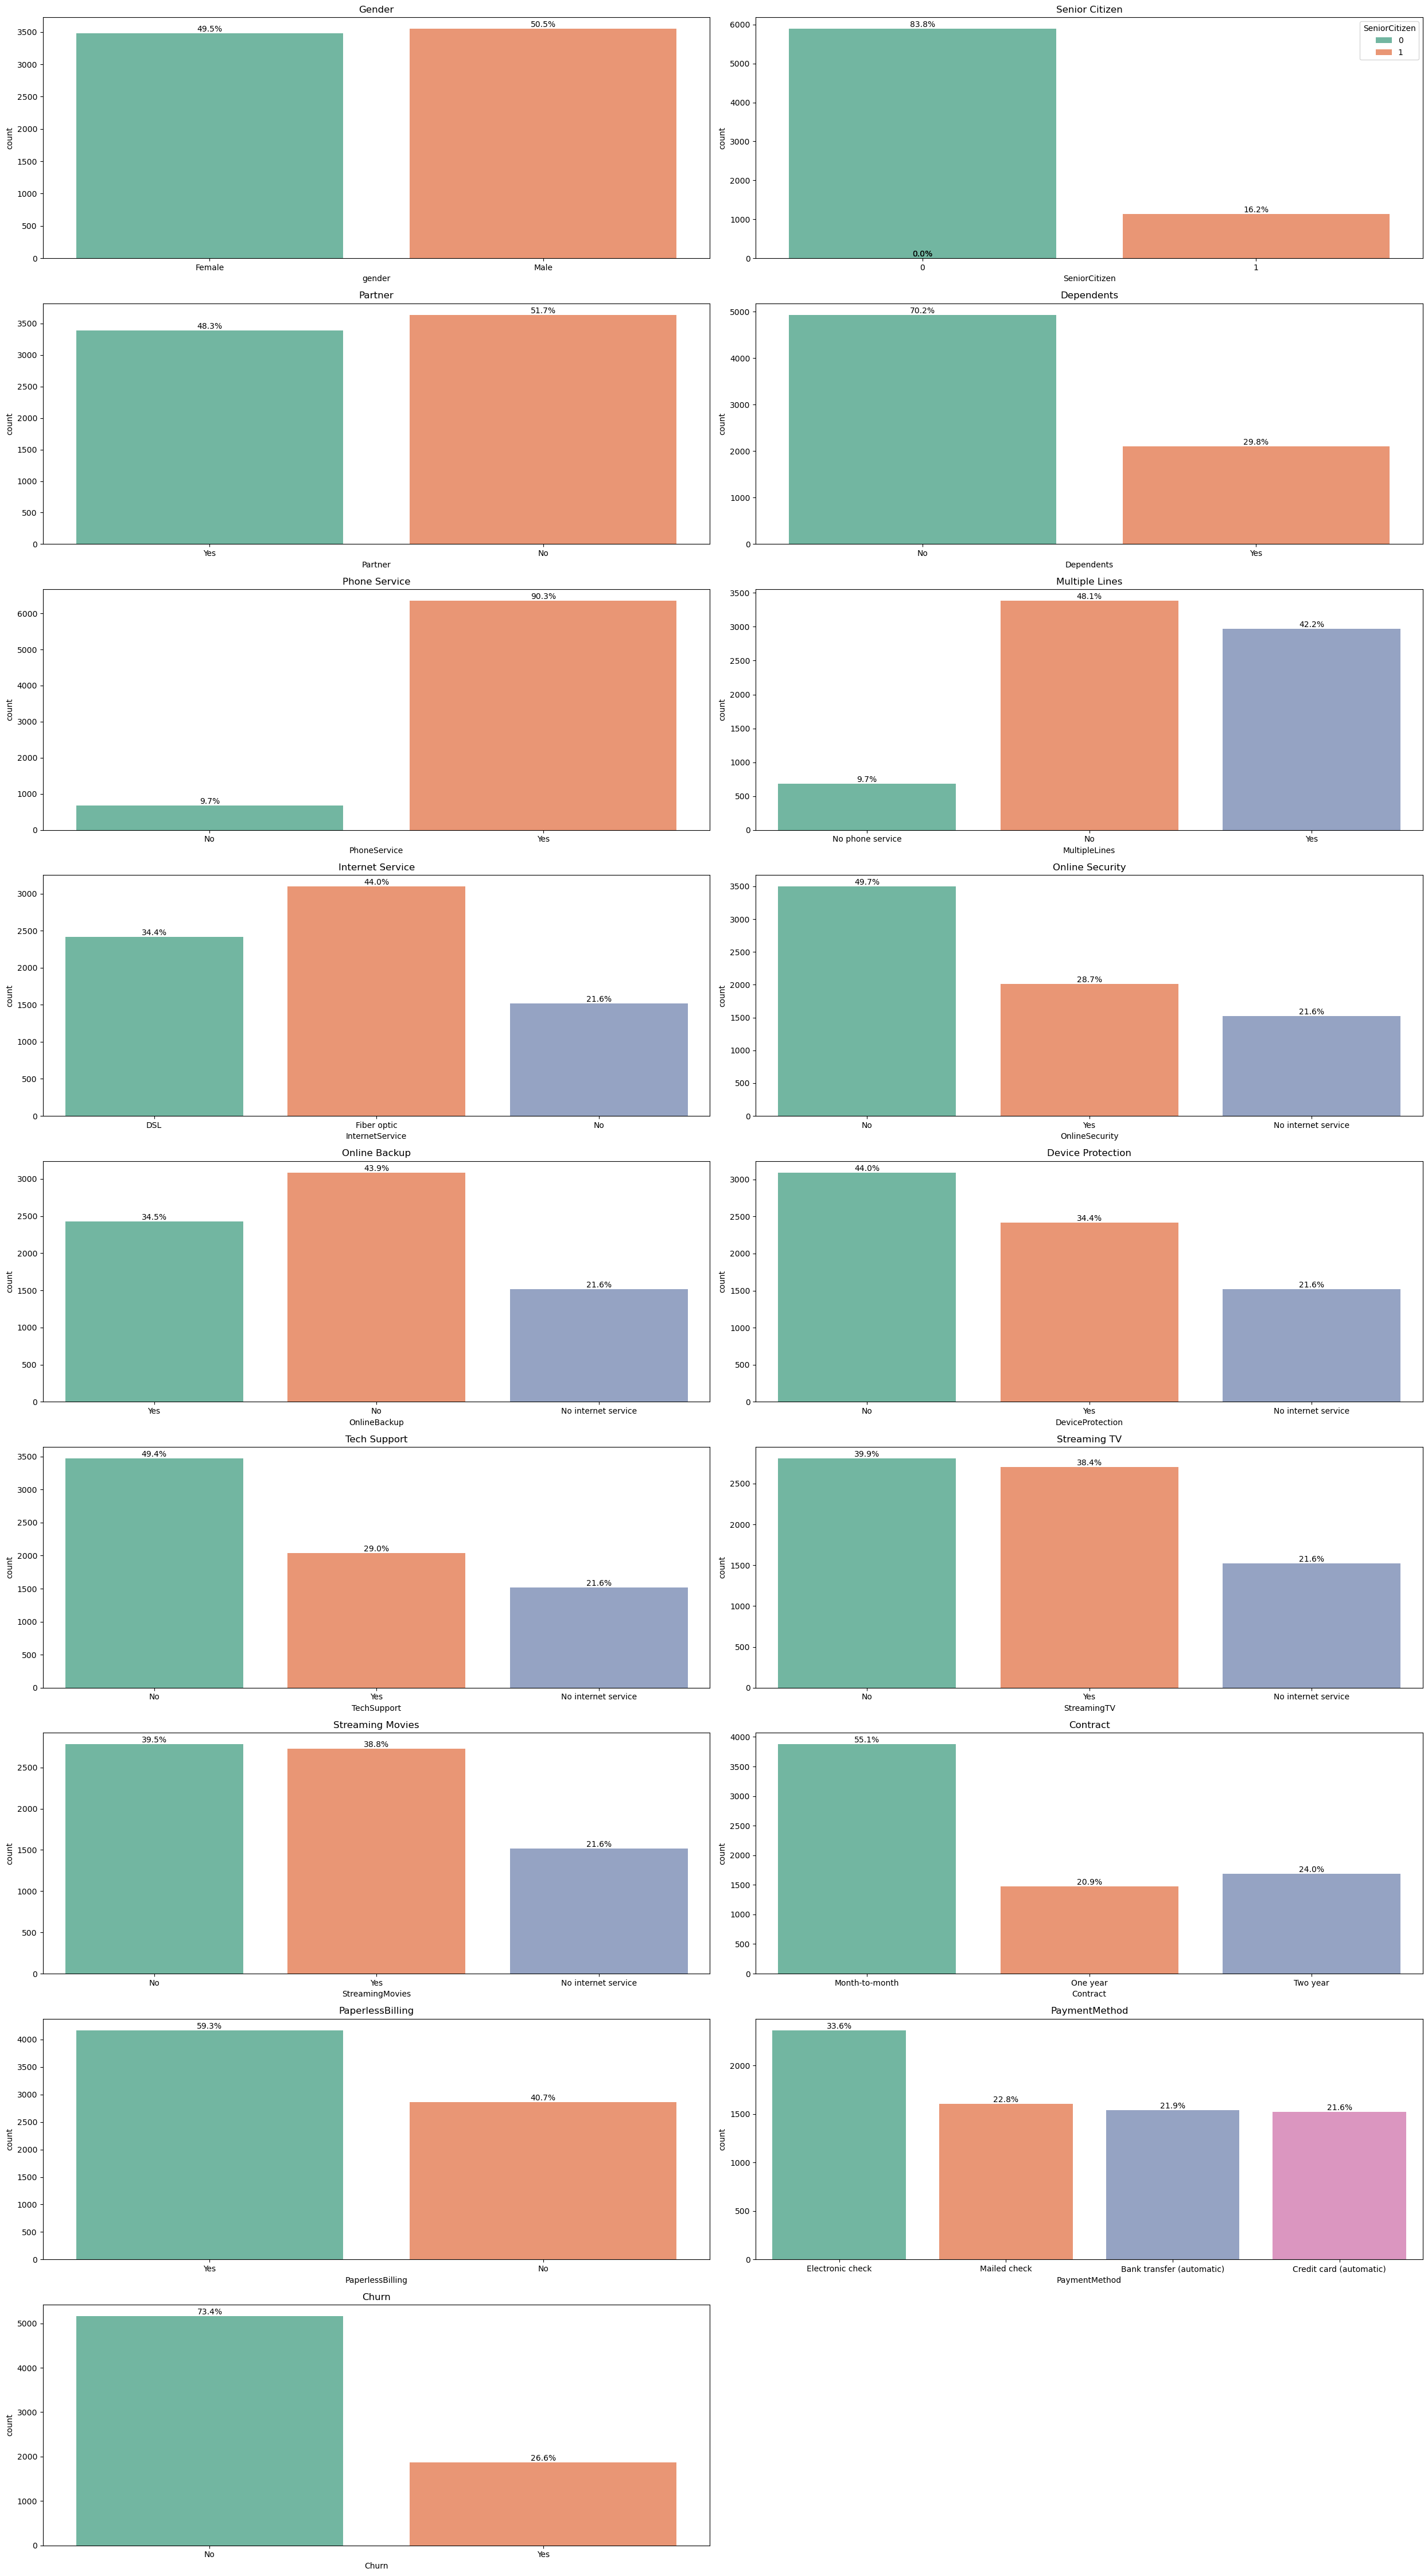

In [9]:
def add_percentage(ax, total):
    for p in ax.patches:
        percent = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percent, (x, y), ha='center', va = 'bottom')

plt.figure(figsize=(25, 45))

plt.subplot(9, 2, 1)
plt.gca().set_title('Gender')
ax1 = sns.countplot(x='gender', palette='Set2', data=df, hue=df['gender'])
add_percentage(ax1, len(df['gender']))

plt.subplot(9, 2, 2)
plt.gca().set_title('Senior Citizen')
ax1 = sns.countplot(x='SeniorCitizen', palette='Set2', data=df, hue=df['SeniorCitizen'])
add_percentage(ax1, len(df['SeniorCitizen']))

plt.subplot(9, 2, 3)
plt.gca().set_title('Partner')
ax1 = sns.countplot(x='Partner', palette='Set2', data=df, hue=df['Partner'])
add_percentage(ax1, len(df['Partner']))

plt.subplot(9, 2, 4)
plt.gca().set_title('Dependents')
ax1 = sns.countplot(x='Dependents', palette='Set2', data=df, hue=df['Dependents'])
add_percentage(ax1, len(df['Dependents']))

plt.subplot(9, 2, 5)
plt.gca().set_title('Phone Service')
ax1 = sns.countplot(x='PhoneService', palette='Set2', data=df, hue=df['PhoneService'])
add_percentage(ax1, len(df['PhoneService']))

plt.subplot(9, 2, 6)
plt.gca().set_title('Multiple Lines')
ax1 = sns.countplot(x='MultipleLines', palette='Set2', data=df, hue=df['MultipleLines'])
add_percentage(ax1, len(df['MultipleLines']))

plt.subplot(9, 2, 7)
plt.gca().set_title('Internet Service')
ax7 = sns.countplot(x='InternetService',  palette='Set2', data=df, hue=df['InternetService'])
add_percentage(ax7, len(df['InternetService']))

plt.subplot(9, 2, 8)
plt.gca().set_title('Online Security')
ax8 = sns.countplot(x='OnlineSecurity',  palette='Set2', data=df, hue=df['OnlineSecurity'])
add_percentage(ax8, len(df['OnlineSecurity']))

plt.subplot(9, 2, 9)
plt.gca().set_title('Online Backup')
ax9 = sns.countplot(x='OnlineBackup',  palette='Set2', data=df, hue=df['OnlineBackup'])
add_percentage(ax9, len(df['OnlineBackup']))

plt.subplot(9, 2, 10)
plt.gca().set_title('Device Protection')
ax10 = sns.countplot(x='DeviceProtection',  palette='Set2', data=df, hue=df['DeviceProtection'])
add_percentage(ax10, len(df['DeviceProtection']))

plt.subplot(9, 2, 11)
plt.gca().set_title('Tech Support')
ax11 = sns.countplot(x='TechSupport',  palette='Set2', data=df, hue=df['TechSupport'])
add_percentage(ax11, len(df['TechSupport']))

plt.subplot(9, 2, 12)
plt.gca().set_title('Streaming TV')
ax12 = sns.countplot(x='StreamingTV',  palette='Set2', data=df, hue=df['StreamingTV'])
add_percentage(ax12, len(df['StreamingTV']))

plt.subplot(9, 2, 13)
plt.gca().set_title('Streaming Movies')
ax13 = sns.countplot(x='StreamingMovies',  palette='Set2', data=df, hue=df['StreamingMovies'])
add_percentage(ax13, len(df['StreamingMovies']))

plt.subplot(9, 2, 14)
plt.gca().set_title('Contract')
ax14 = sns.countplot(x='Contract',  palette='Set2', data=df, hue=df['Contract'])
add_percentage(ax14, len(df['Contract']))

plt.subplot(9, 2, 15)
plt.gca().set_title('PaperlessBilling')
ax15 = sns.countplot(x='PaperlessBilling',  palette='Set2', data=df, hue=df['PaperlessBilling'])
add_percentage(ax15, len(df['PaperlessBilling']))

plt.subplot(9, 2, 16)
plt.gca().set_title('PaymentMethod')
ax16 = sns.countplot(x='PaymentMethod',  palette='Set2', data=df, hue=df['PaymentMethod'])
add_percentage(ax16, len(df['PaymentMethod']))

plt.subplot(9, 2, 17)
plt.gca().set_title('Churn')
ax17 = sns.countplot(x='Churn',  palette='Set2', data=df, hue=df['Churn'])
add_percentage(ax17, len(df['Churn']))

plt.tight_layout()

b) Continuous Variable

In this section, we will evaluate our continuous variables to gain insights into their behavior and 
understand how they impact our customer base:
* Tenure: We observe a peak of new customers, followed by a balanced distribution over the subsequent months. 
This suggests that, while we were maintaining a consistent rate of new customers, there was recently a surge 
in new sign-ups.
* Monthly Charges: Most customers seem to be using basic plans or promotional offers, as there is a high 
    concentration around the minimum charge value.
* Total Charges: While the majority of customers haven't spent a significant amount with the company, there is 
    also a notable segment of loyal customers with higher spending, showing a distribution that extends toward
    higher values.

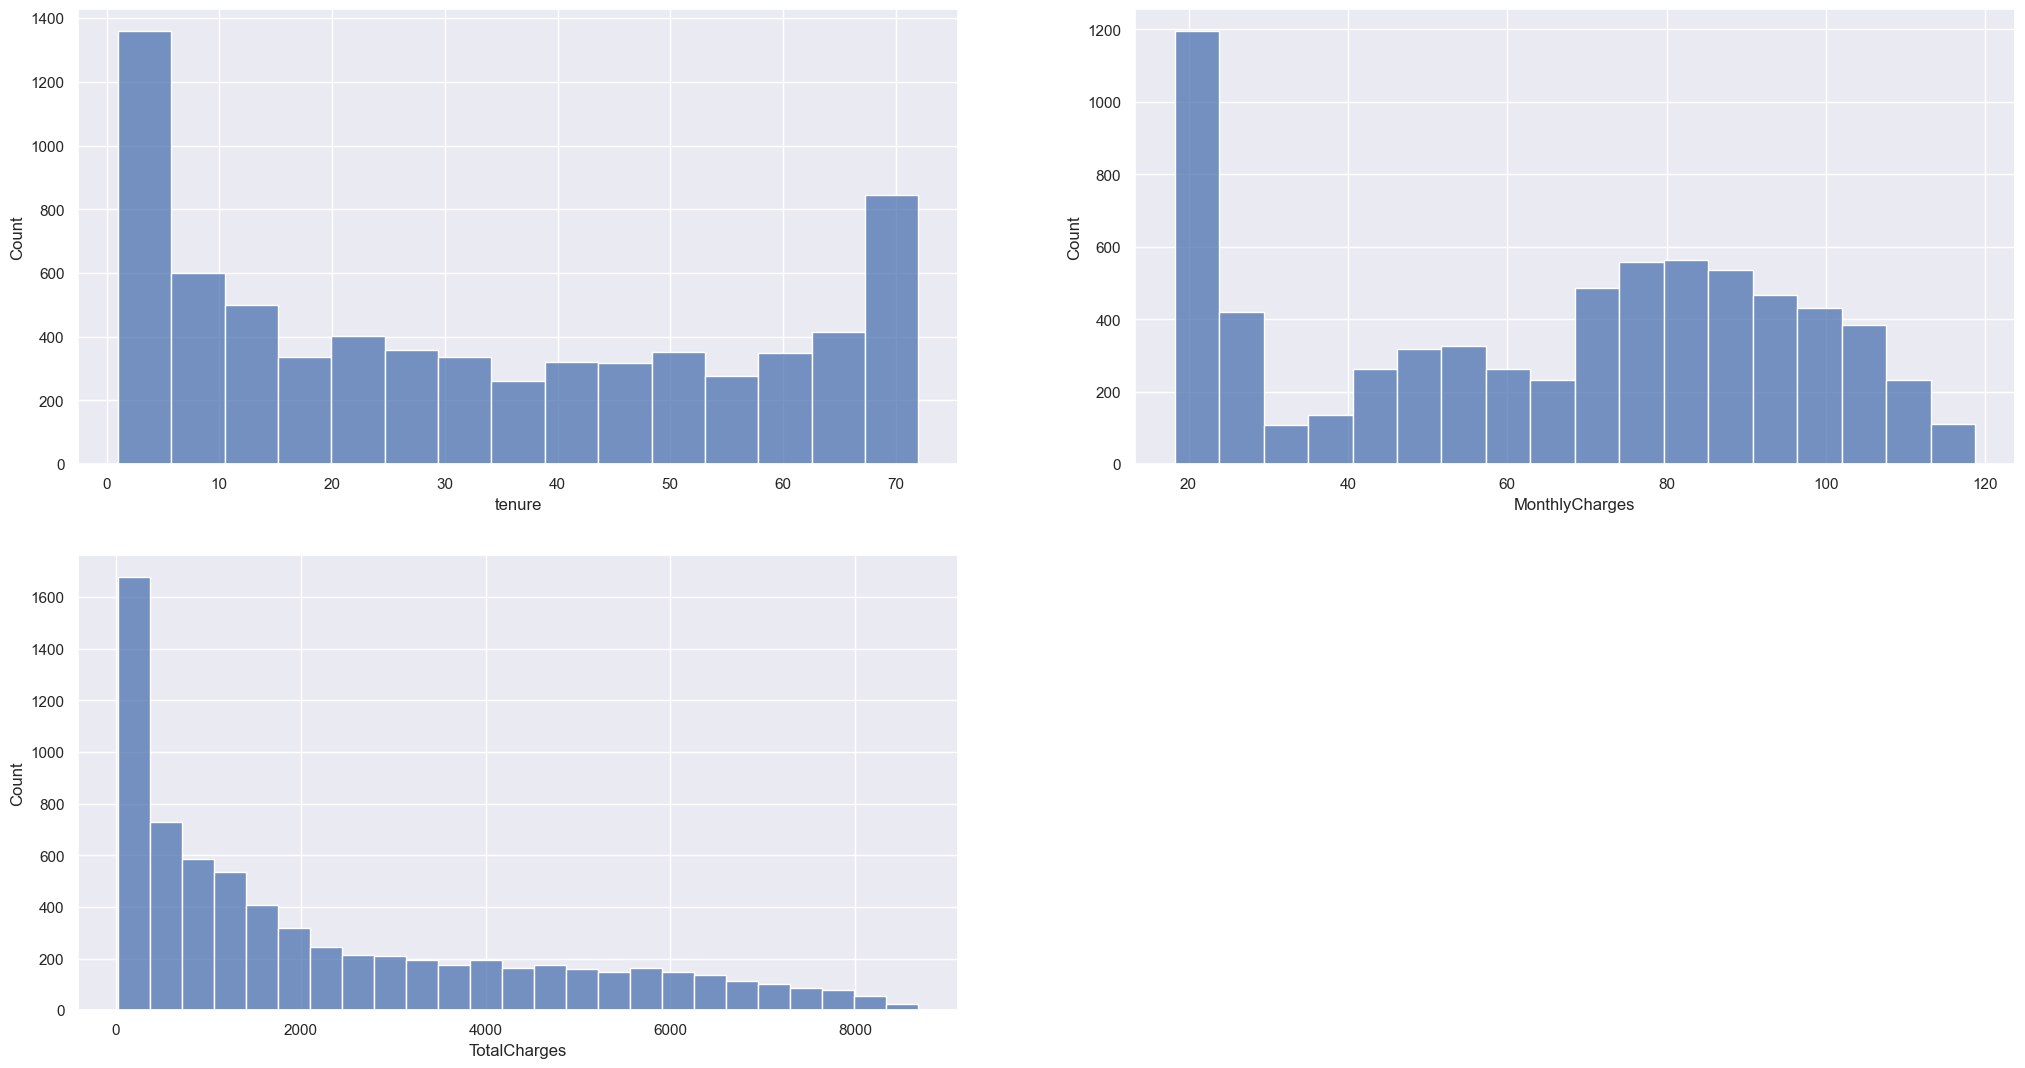

In [10]:
plt.figure(figsize=(25,13))
sns.set(color_codes = True)

def create_histogram(data, subplot):
    ax = plt.subplot(2,2,subplot)
    sns.histplot(data, kde=False, ax=ax)

    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.ticklabel_format(useOffset=False)

create_histogram(df['tenure'], 1)
create_histogram(df['MonthlyCharges'], 2)
create_histogram(df['TotalCharges'], 3)

# plt.tight_layout()

By examining our boxplots, we can confirm that there are no outliers, which is quite significant as it 
indicates that our data does not have any major distortions. Additionally, we can observe key information such
as the median of our monthly charges, which falls between 70 and 80, and the total charges, which range from
1,700 to 2,000.

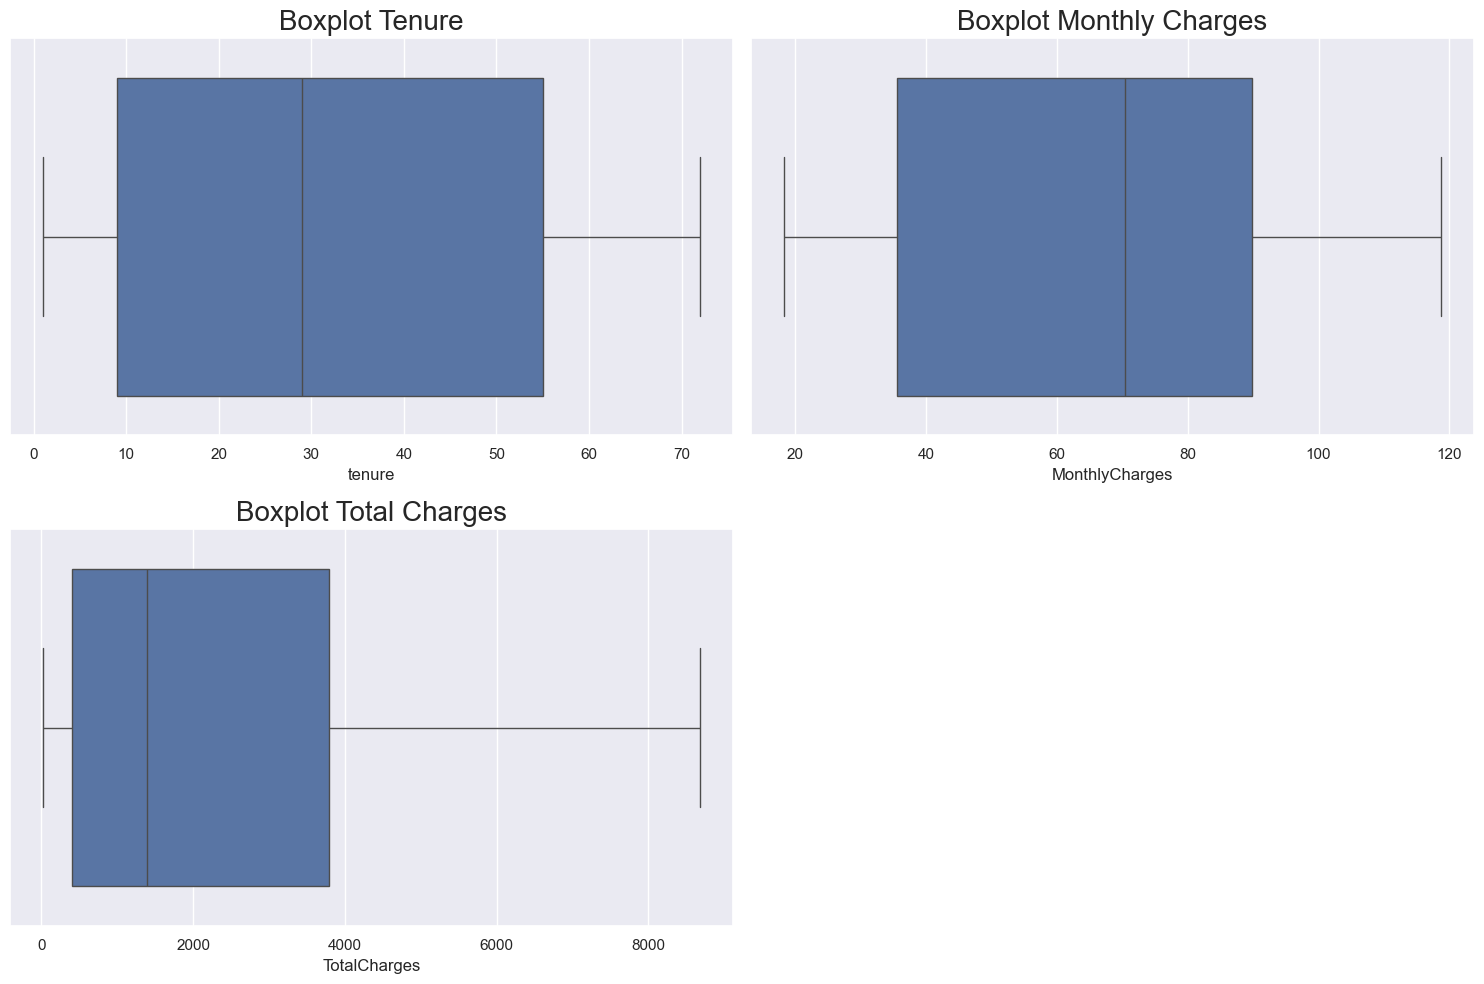

In [11]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
sns.boxplot(x=df['tenure'])
plt.title('Boxplot Tenure', fontdict={'fontsize':20})

plt.subplot(2,2,2)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot Monthly Charges', fontdict={'fontsize':20})

plt.subplot(2,2,3)
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot Total Charges', fontdict={'fontsize':20})

plt.tight_layout()

### Bivariate Analysis

Beginning our bivariate analysis of our variables, we start by examining our target variable, which is 
Churn (whether the customer has stopped being a client). Let’s go over our categorical variables:

* Gender: When we observe the gender variable, we see similar trends across both genders, indicating that 
there isn’t a particular gender more likely to churn. This variable is fairly balanced.

* Senior Citizen: Here, a different pattern emerges. Despite having far fewer elderly clients, they show a
higher likelihood of churning. This presents a potential strategic focus area on elderly clients.

* Partner: Similar to the Senior Citizen variable, though with a less pronounced effect, we see that 
individuals in relationships are more likely to churn.

* Dependents: This variable reveals an interesting pattern. Clients without dependents are more likely to churn 
than those with dependents. This may be because clients with dependents are more inclined to maintain services 
for family members.

* Phone Service: This is an important variable because we have groups with and without phone service, though
the behavior across this variable is balanced.

* Multiple Lines: A balanced variable where no particular behavior favors one outcome over the other.

* Internet Service: A noteworthy behavior is evident here. Clients without internet service have a low churn
    likelihood, while nearly 50% of fiber-optic users are likely to churn, suggesting a potential issue with 
    fiber-optic services, possibly due to cost or service quality.

* Online Security, Device Protection, and Tech Support: Clients with internet service who do not subscribe to
Online Security are significantly more likely to churn compared to those who do, and we observe the same trend
for Device Protection and Tech Support.

* Online Backup: Approximately 40% of customers are likely to cancel this service, indicating a possible 
issue with it.

* Streaming TV and Streaming Movies: For both services, clients without streaming subscriptions are more 
likely to churn.

* Contract: This is a key variable, showing that over half of our churned clients are those with a 
month-to-month contract.

* Payment Method: Another variable with a distinct pattern, showing that 50% of customers using automatic 
bank transfers tend to churn, which warrants further analysis

Conclusion: In summary, we identify a few strategic paths. Most churn-prone clients are elderly and/or without
dependents. Certain services also require attention, as customers with fiber-optic and online backup services
have higher churn rates. Conversely, clients with other additional services are more inclined to remain. 
Offering these services as package deals could help retention. Finally, contract length is significant, as the
majority of churned clients are on month-to-month plans, suggesting an opportunity to convert them to longer-term
contracts.

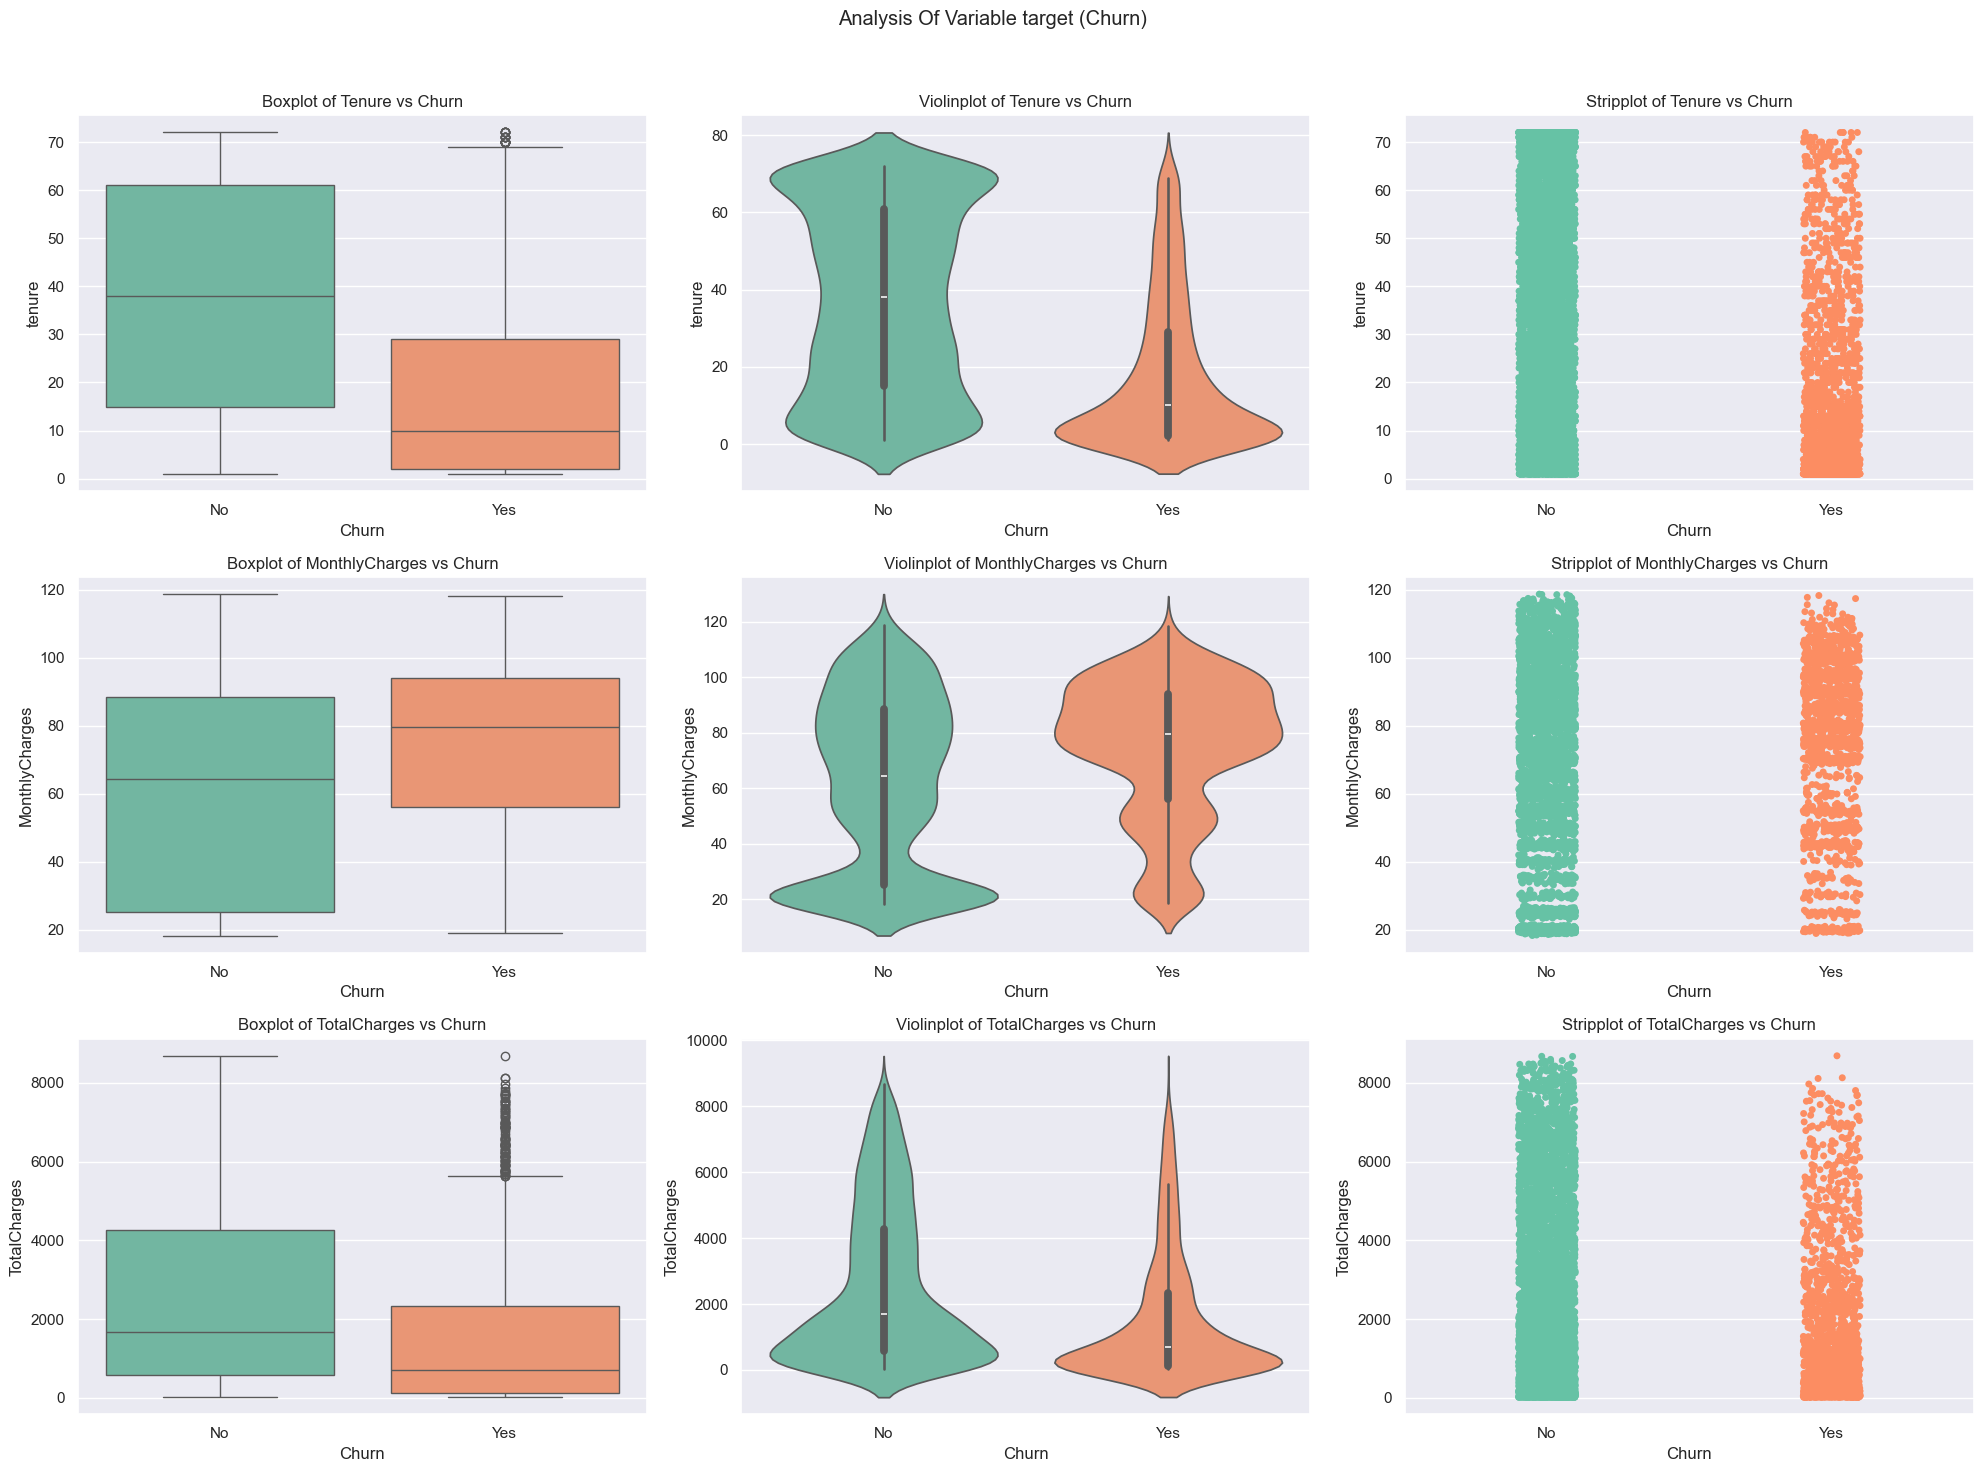

In [12]:
plt.figure(figsize=(20,15))
plt.suptitle('Analysis Of Variable target (Churn)')

plt.subplot(3,3,1)
sns.boxplot(x='Churn', y='tenure', data=df, hue='Churn', palette='Set2')
plt.title('Boxplot of Tenure vs Churn')
plt.subplot(3,3,2)
sns.violinplot(x='Churn', y='tenure', data=df, hue='Churn', palette='Set2')
plt.title('Violinplot of Tenure vs Churn')
plt.subplot(3,3,3)
sns.stripplot(x='Churn', y='tenure', data=df, hue='Churn', palette='Set2')
plt.title('Stripplot of Tenure vs Churn')

plt.subplot(3,3,4)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2')
plt.title('Boxplot of MonthlyCharges vs Churn')
plt.subplot(3,3,5)
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2')
plt.title('Violinplot of MonthlyCharges vs Churn')
plt.subplot(3,3,6)
sns.stripplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2')
plt.title('Stripplot of MonthlyCharges vs Churn')

plt.subplot(3,3,7)
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Set2')
plt.title('Boxplot of TotalCharges vs Churn')
plt.subplot(3,3,8)
sns.violinplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Set2')
plt.title('Violinplot of TotalCharges vs Churn')
plt.subplot(3,3,9)
sns.stripplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Set2')
plt.title('Stripplot of TotalCharges vs Churn')

plt.tight_layout(rect=[0,0,1,0.96])

Looking at the Tenure variable, we can confirm our earlier observation: the longer a client stays, the more likely they are to remain with the 
company. The same trend applies to Total Charges; shorter tenure corresponds to lower total spending, reaffirming that clients with lower total 
spending are more likely to churn. Comparing this with Monthly Charges further confirms that most of our churned clients are those with shorter 
tenures and higher monthly bills.

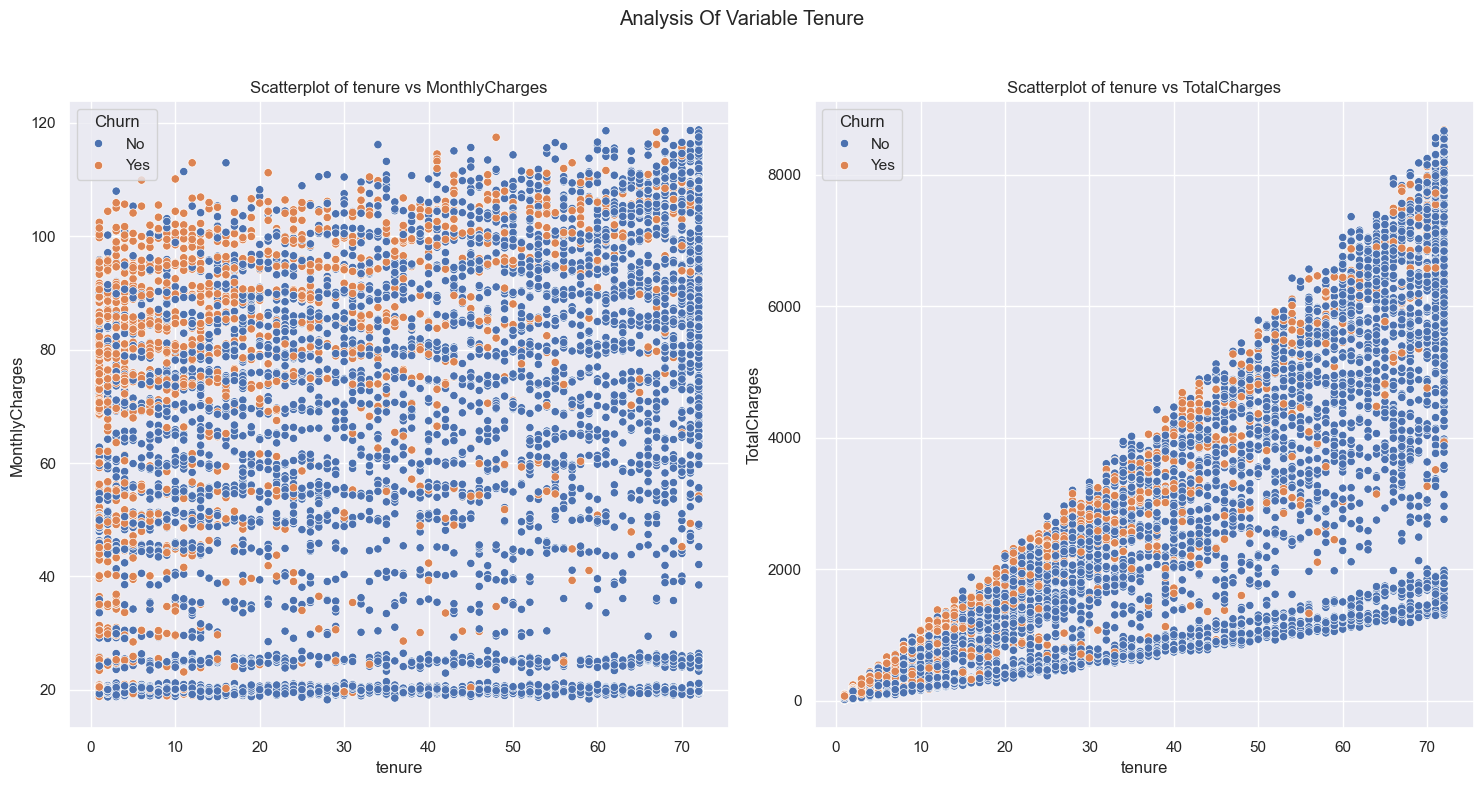

In [13]:
plt.figure(figsize=(15, 8))
plt.suptitle('Analysis Of Variable Tenure')

axes = []

axes.append(plt.subplot(1,2,1))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Scatterplot of tenure vs MonthlyCharges')

axes.append(plt.subplot(1,2,2))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Scatterplot of tenure vs TotalCharges')

for ax in axes:
    ax.ticklabel_format(style='plain', axis='both')

plt.tight_layout(rect=[0,0,1,0.96])

Looking at some variables of interest from our exploratory analysis, we observe several patterns. As noted earlier, clients with higher monthly
bills are more likely to cancel the service, and fiber optic users also show a higher likelihood of churning. When we examine this variable alongside
monthly charges, we see that, on average, fiber optic costs nearly double that of other internet services, confirming our exploratory analysis 
findings. However, when we look at the Online Backup variable, we do not observe the same behavior.

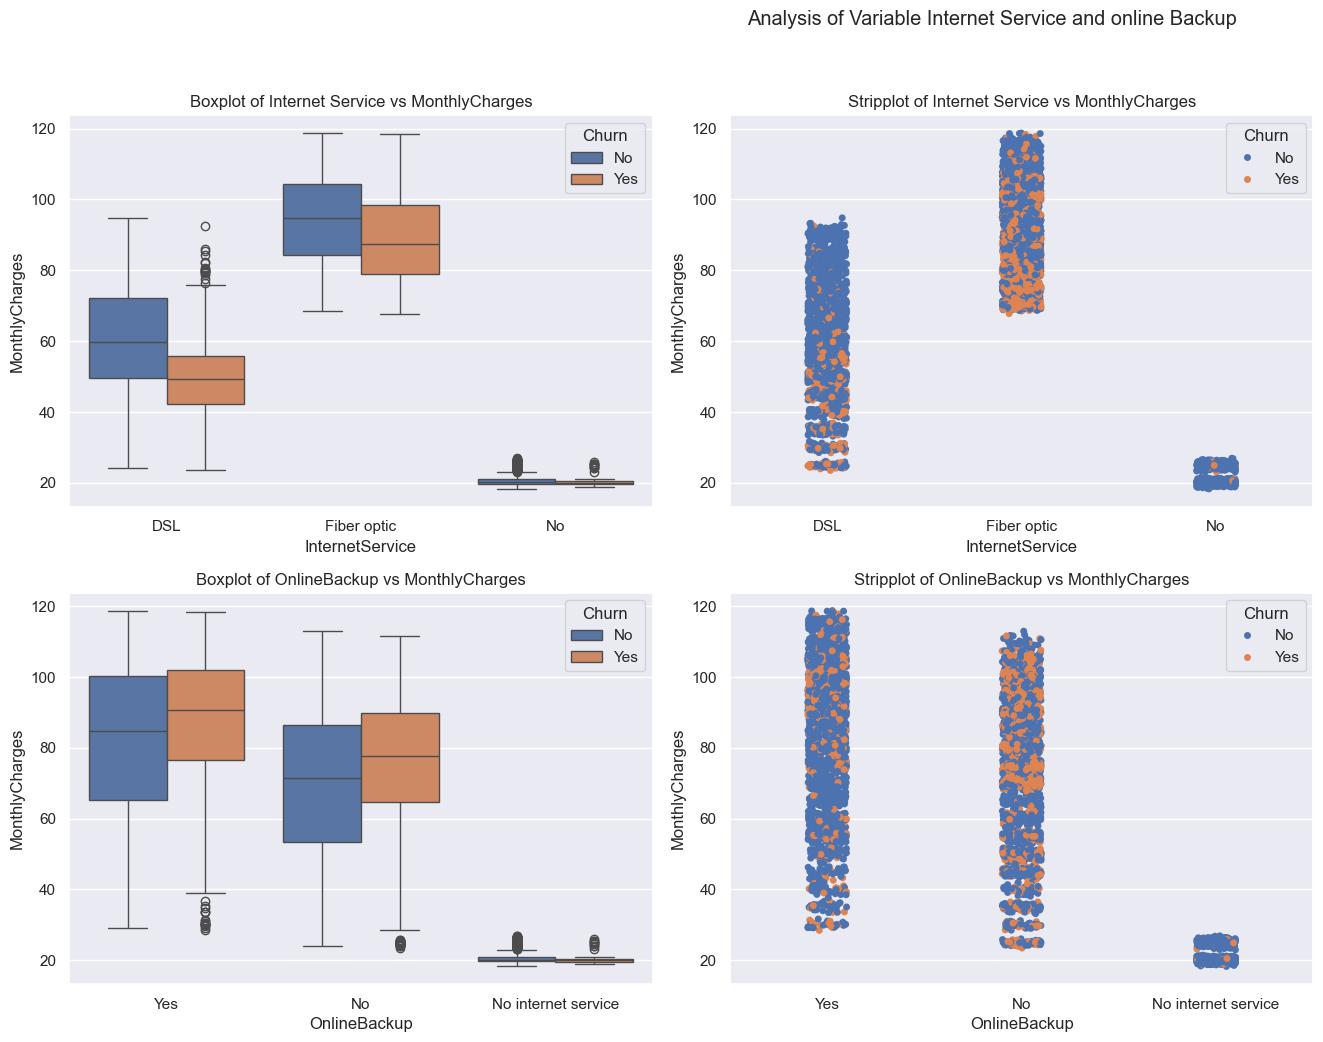

In [14]:
plt.figure(figsize=(20,15))
plt.suptitle('Analysis of Variable Internet Service and online Backup')

plt.subplot(3,3,1)
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Boxplot of Internet Service vs MonthlyCharges')
plt.subplot(3,3,2)
sns.stripplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Stripplot of Internet Service vs MonthlyCharges')

plt.subplot(3,3,4)
sns.boxplot(x='OnlineBackup', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Boxplot of OnlineBackup vs MonthlyCharges')
plt.subplot(3,3,5)
sns.stripplot(x='OnlineBackup', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Stripplot of OnlineBackup vs MonthlyCharges')

plt.tight_layout(rect=[0,0,1,0.96])

### 3. Model Selection